In [1]:
!pip install tensorly

In [921]:
import tensorly 
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
from numpy import linalg as la

In [940]:
tensor_immagini_traning = np.zeros((10304,7,40)) #array con tutte le immagini (7 trainig, 3 test)
for i in range(40):
    for j in range(7):
        tensor_immagini_traning[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+1)+'.pgm')), (10304))

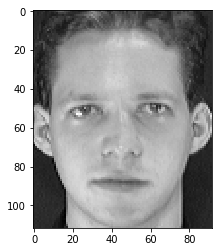

In [941]:
plt.imshow(np.reshape(tensor_immagini_traning[:,0,0],(112,92)), cmap='gray')

In [942]:
U1, s1, V1 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,0),full_matrices =False)
U2, s2, V2 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,1),full_matrices=False)
U3, s3, V3 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,2),full_matrices=False)

Text(0,0.5,'Singular values')

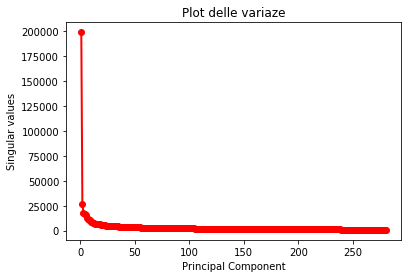

In [943]:
fig1 = plt.figure(figsize=(6,4))
sing_vals = np.arange(280) + 1
plt.plot(sing_vals, s1, 'ro-', linewidth=2)
plt.title('Plot delle variaze')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')

Text(0,0.5,'Singular values')

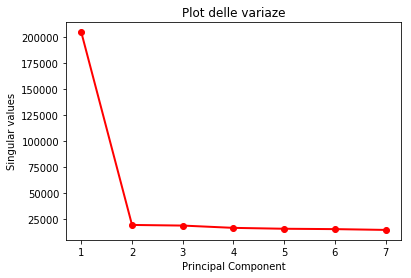

In [944]:
fig1 = plt.figure(figsize=(6,4))
sing_vals = np.arange(7) + 1
plt.plot(sing_vals, s2, 'ro-', linewidth=2)
plt.title('Plot delle variaze')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')

In [945]:
num_eigenpixel = 50

In [946]:
num_eigenperson = 2 #(massimo 7)

In [947]:
eigenpixel = np.zeros((10304,num_eigenpixel))
for i in range (num_eigenpixel):
    eigenpixel[:,i] = U1[:,i]

In [948]:
eigenperson = np.zeros((7,num_eigenperson))
for i in range (num_eigenperson):
    eigenperson[:,i] = U2[:,i]

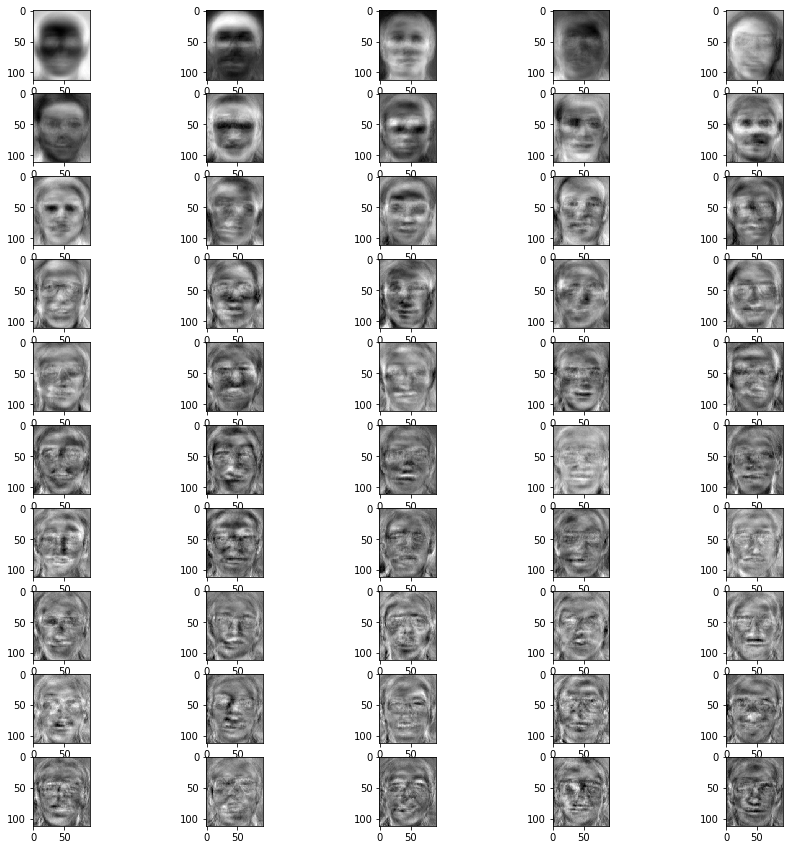

In [949]:
fig = plt.figure(figsize=(15,15))
for i in range (num_eigenpixel):
    plt.subplot(10,5,i+1)
    plt.imshow(np.reshape(eigenpixel[:,i],(112,92)), cmap='gray')

In [950]:
S=tensorly.tenalg.mode_dot(tensor_immagini_traning, np.transpose(eigenpixel), mode=0)
S=tensorly.tenalg.mode_dot(S, np.transpose(eigenperson), mode=1)
#S=tensorly.tenalg.mode_dot(S, np.transpose(U3), mode=2)

In [951]:
immagine_test = np.reshape(plt.imread(("../Data-set/s1/10.pgm")), (1,10304))

In [952]:
immagine_test_tens = immagine_test.dot(eigenpixel)

In [953]:
core_basis = np.zeros((40))
for i in range (40):
    U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
    core_basis[i] =  np.linalg.norm(U1[:,0] - immagine_test_tens, 2)

In [954]:
core_basis.argmin()

0

In [955]:
core_basis = np.zeros((num_eigenpixel,40))#calcoliamo basi una per ognuna delle 40 persone(prendiamo solo il primo vettore singolare sinistro della svd sulle slice frontali dove ogni slice rappresenta una persona)
for i in range (40):
    U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
    core_basis[:,i] =  U1[:,0]

In [956]:
tensor_immagini_test = np.zeros((10304,3,40)) #tensore con 3 immagini di test per ogni persona(40 persone)
for i in range(40):
    for j in range(3):
        tensor_immagini_test[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+8)+'.pgm')), (10304))

In [957]:
tensor_immagini_testj=tensorly.tenalg.mode_dot(tensor_immagini_test, np.transpose(eigenpixel), mode=0)#proietto d*Uj

In [958]:
residui_minimi = np.zeros((40,3))
residui = np.zeros(40)
for i in range(40):#persone
    for j in range(3):#immagini stessa persona classificate una alla volta
        for k in range(40):
            residui[k] =  np.linalg.norm(core_basis[:,k] -tensor_immagini_testj[:,j,i] , 2)
        residui_minimi[i,j] = residui.argmin()

In [959]:
residui_minimi

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 3.,  3.,  3.],
       [39., 39., 39.],
       [ 5.,  5.,  5.],
       [ 6.,  6.,  6.],
       [ 7.,  7.,  7.],
       [ 8.,  8.,  8.],
       [ 9.,  9.,  3.],
       [10., 10., 10.],
       [11., 11., 11.],
       [12., 12., 12.],
       [13., 13., 13.],
       [14., 14., 34.],
       [ 0., 15., 23.],
       [16., 16., 16.],
       [17., 17., 17.],
       [18., 10., 18.],
       [19., 19., 19.],
       [20., 20., 20.],
       [21., 21., 21.],
       [22., 22., 37.],
       [23., 23., 23.],
       [24., 24., 24.],
       [25., 25., 25.],
       [26., 26., 26.],
       [36., 27., 27.],
       [28., 22., 28.],
       [29., 29., 29.],
       [ 8.,  8., 30.],
       [31., 31., 31.],
       [32., 32., 32.],
       [33., 33., 33.],
       [34.,  0., 39.],
       [35., 35., 35.],
       [36., 36., 36.],
       [37., 37., 37.],
       [38., 38., 38.],
       [39., 39.,  4.]])

In [960]:
num_classificazioni_corrette = 0
k = 0
for i in range(40):
    for j in range(3):
        if(residui_minimi[i,j]==k):
            num_classificazioni_corrette = num_classificazioni_corrette + 1
    k =k + 1

In [961]:
(num_classificazioni_corrette/120)*100

86.66666666666667

In [962]:
def hosvd_classificazione(eigenpixel,i,eigenperson,tensor_immagini_traning,tensor_immagini_test):
    S=tensorly.tenalg.mode_dot(tensor_immagini_traning, np.transpose(eigenpixel), mode=0)
    S=tensorly.tenalg.mode_dot(S, np.transpose(eigenperson), mode=1)
    #S=tensorly.tenalg.mode_dot(S, np.transpose(U3), mode=2)
    core_basis = np.zeros((i,40))#calcoliamo basi una per ognuna delle 40 persone(prendiamo solo il primo vettore singolare sinistro della svd sulle slice frontali dove ogni slice rappresenta una persona)
    for i in range (40):
        U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
        core_basis[:,i] =  U1[:,0]
    tensor_immagini_testj=tensorly.tenalg.mode_dot(tensor_immagini_test, np.transpose(eigenpixel), mode=0)#proietto d*Uj
    residui_minimi = np.zeros((40,3))
    residui = np.zeros(40)
    for i in range(40):#persone
        for j in range(3):#immagini stessa persona classificate una alla volta
            for k in range(40):
                residui[k] =  np.linalg.norm(core_basis[:,k] -tensor_immagini_testj[:,j,i] , 2)
            residui_minimi[i,j] = residui.argmin()
    num_classificazioni_corrette = 0
    k = 0
    for i in range(40):
        for j in range(3):
            if(residui_minimi[i,j]==k):
                num_classificazioni_corrette = num_classificazioni_corrette + 1
        k =k + 1
    return (num_classificazioni_corrette/120)*100

In [963]:
tensor_immagini_traning = np.zeros((10304,7,40)) #array con tutte le immagini (7 trainig, 3 test)
for i in range(40):
    for j in range(7):
        tensor_immagini_traning[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+1)+'.pgm')), (10304))

In [964]:
U1, s1, V1 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,0),full_matrices =False)
U2, s2, V2 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,1),full_matrices=False)
U3, s3, V3 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,2),full_matrices=False)

In [965]:
num_eigenperson = 7 #(massimo 7)
eigenperson = np.zeros((7,num_eigenperson))
for i in range (num_eigenperson):
    eigenperson[:,i] = U2[:,i]

In [966]:
tensor_immagini_test = np.zeros((10304,3,40)) #tensore con 3 immagini di test per ogni persona(40 persone)
for i in range(40):
    for j in range(3):
        tensor_immagini_test[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+8)+'.pgm')), (10304))

In [ ]:
percentuale_classificazione = np.zeros((280))
for i in range(1,281):
    eigenpixel = np.zeros((10304,i))
    for j in range (i):
        eigenpixel[:,j] = U1[:,j]
    percentuale_classificazione[i-1] = hosvd_classificazione(eigenpixel,i,eigenperson,tensor_immagini_traning,tensor_immagini_test)
    print("Eigenpixel= "+ str(i)+ "       percentuale classificazione= " + str(percentuale_classificazione[i-1]))
    

Eigenpixel= 1       percentuale classificazione= 2.5
Eigenpixel= 2       percentuale classificazione= 12.5
Eigenpixel= 3       percentuale classificazione= 18.333333333333332
Eigenpixel= 4       percentuale classificazione= 30.833333333333336
Eigenpixel= 5       percentuale classificazione= 0.0
Eigenpixel= 6       percentuale classificazione= 0.0
Eigenpixel= 7       percentuale classificazione= 58.333333333333336
Eigenpixel= 8       percentuale classificazione= 62.5
Eigenpixel= 9       percentuale classificazione= 66.66666666666666
Eigenpixel= 10       percentuale classificazione= 70.0
Eigenpixel= 11       percentuale classificazione= 72.5
Eigenpixel= 12       percentuale classificazione= 73.33333333333333
Eigenpixel= 13       percentuale classificazione= 75.83333333333333
Eigenpixel= 14       percentuale classificazione= 77.5
Eigenpixel= 15       percentuale classificazione= 78.33333333333333
Eigenpixel= 16       percentuale classificazione= 79.16666666666666
Eigenpixel= 17       perc

Eigenpixel= 128       percentuale classificazione= 86.66666666666667
Eigenpixel= 129       percentuale classificazione= 86.66666666666667
Eigenpixel= 130       percentuale classificazione= 86.66666666666667
Eigenpixel= 131       percentuale classificazione= 86.66666666666667
Eigenpixel= 132       percentuale classificazione= 86.66666666666667
Eigenpixel= 133       percentuale classificazione= 86.66666666666667
Eigenpixel= 134       percentuale classificazione= 86.66666666666667
Eigenpixel= 135       percentuale classificazione= 86.66666666666667
Eigenpixel= 136       percentuale classificazione= 86.66666666666667
Eigenpixel= 137       percentuale classificazione= 86.66666666666667
Eigenpixel= 138       percentuale classificazione= 86.66666666666667
Eigenpixel= 139       percentuale classificazione= 86.66666666666667
Eigenpixel= 140       percentuale classificazione= 86.66666666666667
Eigenpixel= 141       percentuale classificazione= 86.66666666666667
Eigenpixel= 142       percentuale 

In [ ]:
fig2 = plt.figure(figsize=(6,4))
eigenpixel_vals = np.arange(280) + 1
plt.plot(eigenpixel_vals, percentuale_classificazione, 'ro-', linewidth=2)
plt.title('Plot clasificazione')
plt.xlabel('numero eigenpixel')
plt.ylabel('percentuale classificazione')